In [1]:
import tf_keras as keras
from tf_keras import layers
import tensorflow_hub as hub

/Users/jurepi/Work/Study/hm-dl/.venv/lib/python3.10/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [2]:
hub_efficientNetb7 = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Rescaling(1./255),
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b7-classification/1")
])


2025-07-21 19:32:12.657549: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-07-21 19:32:12.657568: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-07-21 19:32:12.657575: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-07-21 19:32:12.657586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-21 19:32:12.657594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
import numpy as np
from PIL import Image

import glob

img_paths = glob.glob("../data/dogs-vs-cats/images/*.png")
img_pngs = [np.array(Image.open(img_path)) for img_path in img_paths]

print(img_pngs[0].shape)

(224, 224, 3)


In [4]:
import matplotlib.pyplot as plt

def show_predictions(pred_imgs, data_path="../data/dogs-vs-cats/imagenette"):
    fig, axes = plt.subplots(1, len(pred_imgs), figsize=(20, 5))
    for ax, (label, name, score) in zip(axes, pred_imgs):
        img_png = Image.open(data_path + '/' + label + "_" + name + ".jpeg")
        ax.imshow(img_png)
        ax.axis('off')
        ax.set_title(f"{name}\n{float(score):.3f}", fontsize=12)
    plt.tight_layout()
    plt.show()

2025-07-21 19:32:21.086287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


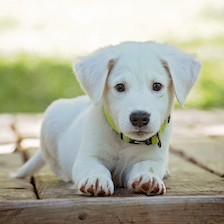

[('n02104029', 'kuvasz', 0.7650078), ('n02111500', 'Great_Pyrenees', 0.05408822), ('n02099601', 'golden_retriever', 0.03105889), ('n02099712', 'Labrador_retriever', 0.008652955), ('n02110341', 'dalmatian', 0.0022857618)]


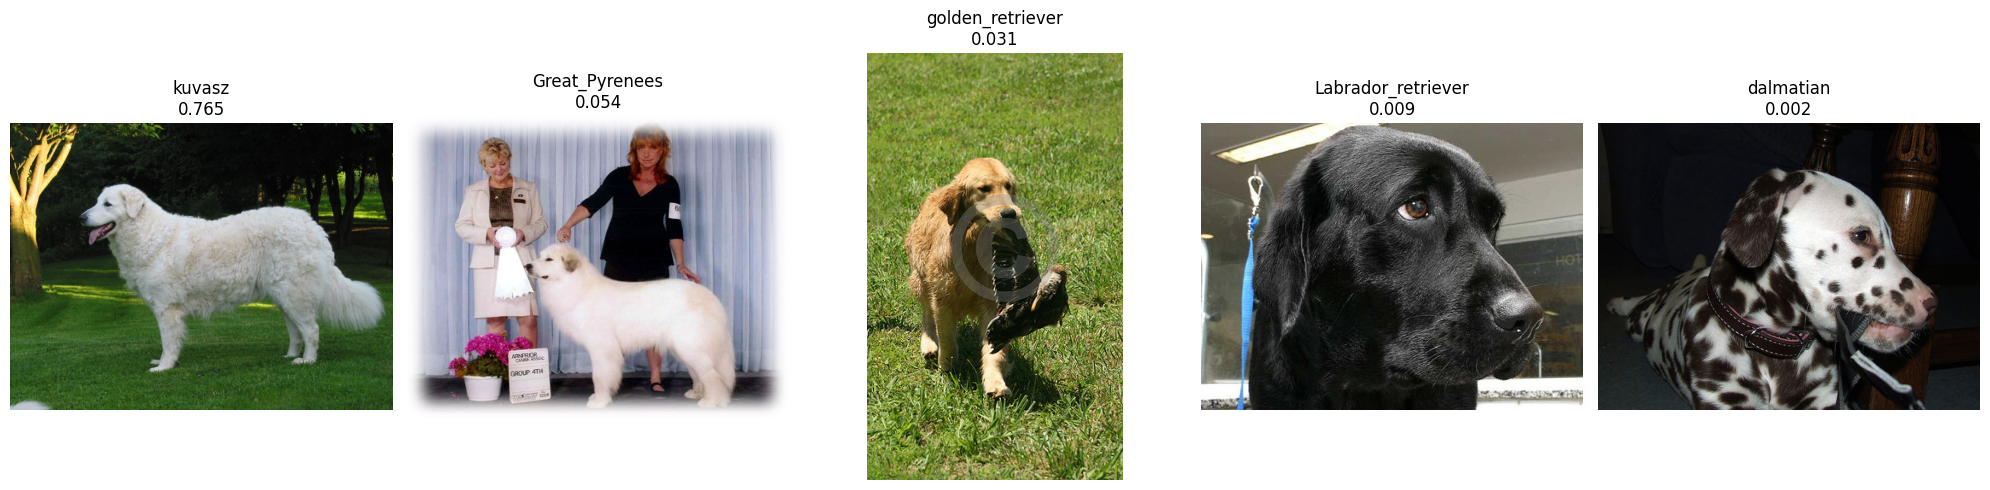

1/1 [==============================] - 0s 48ms/step


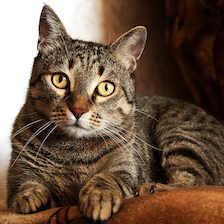

[('n02123159', 'tiger_cat', 0.6807691), ('n02123045', 'tabby', 0.19800821), ('n02124075', 'Egyptian_cat', 0.052878175), ('n02129604', 'tiger', 0.0009761099), ('n02127052', 'lynx', 0.00082884985)]


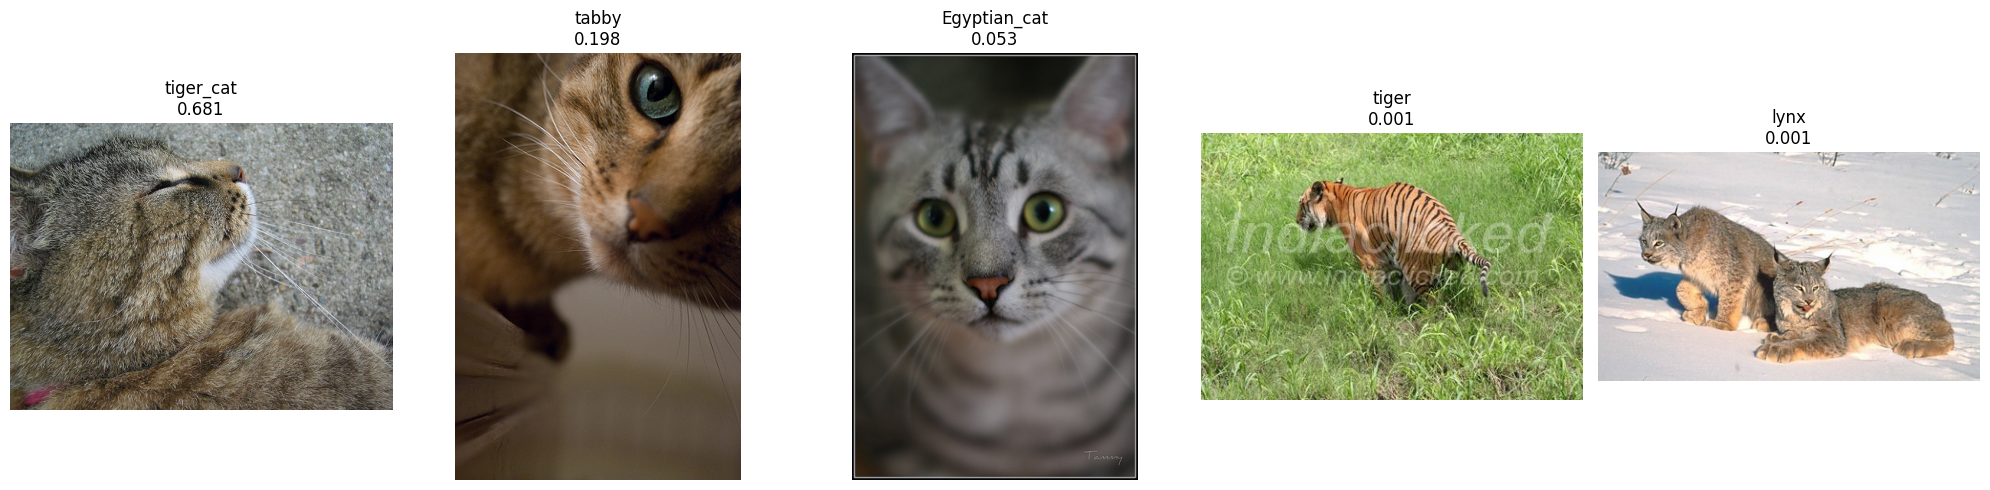

In [5]:
from keras.applications import efficientnet

i = 0
for img_png in img_pngs:
    predictions = hub_efficientNetb7.predict(img_png[np.newaxis,:])
    pred_imgs = efficientnet.decode_predictions(predictions)[0][:5]
    display(Image.open(img_paths[i]))
    print(pred_imgs)
    show_predictions(pred_imgs)
    i += 1